In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import glob
import shutil
import os
import gc
import pathlib
print(os.listdir("../input/"))
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# Any results you write to the current directory are saved as output.

['resnet34', 'dogs-vs-cats-redux-kernels-edition']


In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.backends.cudnn.enabled

True

In [5]:
dog_indexes = []
cat_indexes = []

In [6]:
for name in os.listdir('../input/dogs-vs-cats-redux-kernels-edition/train/'):
    if 'cat' in name:
        cat_indexes.append(name.split('.')[1])
    if 'dog' in name:
        dog_indexes.append(name.split('.')[1])

In [7]:
print ('Dog!\n',len(dog_indexes), '\nCat!\n', len(cat_indexes))

Dog!
 12500 
Cat!
 12500


In [8]:
cat_val_list = random.sample(cat_indexes, 2500)
dog_val_list = random.sample(dog_indexes, 2500)

In [9]:
os.makedirs('../working/dogcats/valid/cats/')
os.makedirs('../working/dogcats/valid/dogs/')
os.makedirs('../working/dogcats/train/cats/')
os.makedirs('../working/dogcats/train/dogs/')
os.makedirs('../working/dogcats/test/')

In [10]:
train_dir = "../input/dogs-vs-cats-redux-kernels-edition/train/"
test_dir = "../input/dogs-vs-cats-redux-kernels-edition/test/"
cat_train_dir = "../working/dogcats/train/cats/"
cat_valid_dir = "../working/dogcats/valid/cats/"
dog_train_dir = "../working/dogcats/train/dogs/"
dog_valid_dir = "../working/dogcats/valid/dogs/"
dogcats_test = "../working/dogcats/test/"

In [11]:
PATH = "../working/dogcats/"
sz=224

In [15]:
for jpgfile in iglob(os.path.join(train_dir, "cat*.jpg")):
    if jpgfile.split('.')[3] in cat_val_list:
        shutil.copy(jpgfile, cat_valid_dir)
    else:
        shutil.copy(jpgfile, cat_train_dir)

for jpgfile in iglob(os.path.join(train_dir, "dog*.jpg")):
    if jpgfile.split('.')[3] in dog_val_list:
        shutil.copy(jpgfile, dog_valid_dir)
    else:
        shutil.copy(jpgfile, dog_train_dir)
        

for jpgfile in iglob(os.path.join(test_dir, "*.jpg")):
    shutil.copy(jpgfile, dogcats_test)

In [12]:
cache_dir = os.path.expanduser(os.path.join('~', '.torch'))
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
models_dir = os.path.join(cache_dir, 'models')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [13]:
!cp ../input/resnet34/resnet34.pth /tmp/.torch/models/resnet34-333f7ec4.pth

In [14]:
md.path = pathlib.Path('.')

NameError: name 'md' is not defined

In [16]:
gc.collect()

312

**LOOK AT DOG PICTURES**

In [17]:
files = os.listdir('./dogcats/train/dogs/')[:5]
files

['dog.6847.jpg', 'dog.81.jpg', 'dog.4696.jpg', 'dog.487.jpg', 'dog.8197.jpg']

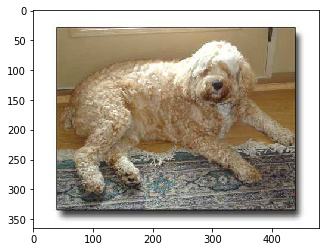

In [18]:
img = plt.imread(f'./dogcats/train/dogs/{files[0]}')
plt.imshow(img)

In [19]:
img.shape

(365, 480, 3)

In [20]:
img[:4,:4]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

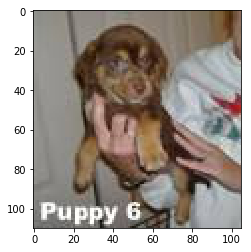

In [21]:
img = plt.imread(f'./dogcats/train/dogs/{files[1]}')
plt.imshow(img)

In [22]:
img.shape

(110, 105, 3)

In [23]:
img[:4,:4]

array([[[145, 147, 142],
        [142, 144, 139],
        [140, 141, 136],
        [139, 140, 135]],

       [[146, 148, 143],
        [142, 144, 139],
        [140, 141, 136],
        [139, 140, 135]],

       [[146, 148, 143],
        [143, 145, 140],
        [140, 141, 136],
        [140, 141, 136]],

       [[146, 148, 143],
        [143, 145, 140],
        [141, 142, 137],
        [140, 141, 136]]], dtype=uint8)

In [24]:
os.listdir('../working/dogcats/train/')

['dogs', 'cats']

In [25]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True)